In [450]:
! pip install folium
! pip install geocoder

In [451]:

import pandas as pd
import numpy as np
import folium 
import sklearn
import geocoder
from geopy.geocoders import Nominatim
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.colors import Colormap as cmap
from matplotlib.cm import ScalarMappable

In [452]:
areas_df=pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[0]

In [453]:
CLIENT_ID ='H1HEOTBF42KKGPEI3FBRTTWKOGG1FF4C13XNWR0KO1NA034D' # your Foursquare ID
CLIENT_SECRET = 'KMDVZ5X3LFVPWGC0MJJT0OQRZAOMUILUEGNZJUNRG5EZJL2V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

categories=['4d4b7105d754a06374d81259']
LIMIT=100
RADIUS=500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('LIMIT:',LIMIT)
print('RADIUS:',RADIUS)


# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     VERSION, 
#     ll[0], 
#     ll[1], 
#     radius, 
#     LIMIT)

Your credentails:
CLIENT_ID: H1HEOTBF42KKGPEI3FBRTTWKOGG1FF4C13XNWR0KO1NA034D
CLIENT_SECRET:KMDVZ5X3LFVPWGC0MJJT0OQRZAOMUILUEGNZJUNRG5EZJL2V
LIMIT: 100
RADIUS: 500


In [454]:
areas_df

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [455]:
def get_latitudes(df):
    return [x for x in zip(df.Latitudes,df.Longitudes)]

In [456]:
latlngs=areas_df.apply(lambda x : (x[-2],x[-1]),axis=1)

In [457]:
def get_url(latlng):
    ll=latlng
    url = 'https://api.foursquare.com/v2/venues/explore?categoryID={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    categories,CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ll[0], 
    ll[1], 
    RADIUS, 
    LIMIT)
    
    return url

In [458]:
urls=latlngs.map(get_url)

In [459]:

resp=urls.map(requests.get)

In [460]:
venues=resp.map(lambda x:x.json().get('response',0))
venues=venues.map(lambda x: x.get('groups',0) )

zeroind=venues[venues==0].index.tolist()

In [461]:
venues=venues.drop(zeroind)

In [462]:
venues=venues.map(lambda x: x[0])
venues=venues.map(lambda x:x.get('items',0))

In [463]:
lens=venues.map(lambda x :len(x))
index=lens[lens==0].index
blank_items_index=index.tolist()



In [464]:
venues=venues.drop(blank_items_index)

In [465]:
venues

0     [{'reasons': {'count': 0, 'items': [{'summary'...
1     [{'reasons': {'count': 0, 'items': [{'summary'...
2     [{'reasons': {'count': 0, 'items': [{'summary'...
3     [{'reasons': {'count': 0, 'items': [{'summary'...
4     [{'reasons': {'count': 0, 'items': [{'summary'...
5     [{'reasons': {'count': 0, 'items': [{'summary'...
7     [{'reasons': {'count': 0, 'items': [{'summary'...
8     [{'reasons': {'count': 0, 'items': [{'summary'...
9     [{'reasons': {'count': 0, 'items': [{'summary'...
10    [{'reasons': {'count': 0, 'items': [{'summary'...
11    [{'reasons': {'count': 0, 'items': [{'summary'...
12    [{'reasons': {'count': 0, 'items': [{'summary'...
13    [{'reasons': {'count': 0, 'items': [{'summary'...
14    [{'reasons': {'count': 0, 'items': [{'summary'...
15    [{'reasons': {'count': 0, 'items': [{'summary'...
16    [{'reasons': {'count': 0, 'items': [{'summary'...
17    [{'reasons': {'count': 0, 'items': [{'summary'...
19    [{'reasons': {'count': 0, 'items': [{'summ

In [466]:
rests_names_acc_to_area=[]
rests_locs_cc_to_area=[]
rests_cats_acc_to_area=[]

restaurants=[]

for venue in venues:
    
    restaurant_names=[]
    restaurant_locations=[]
    restaurant_categories=[]
    
    rests=[]
    
    for rest in venue:
        restaurant_names.append(rest['venue']['name'])
        restaurant_locations.append([rest['venue']['location']['lat'],rest['venue']['location']['lng']])
        restaurant_categories.append(rest['venue']['categories'][0]['name'])
        
        rests.append([rest['venue']['name'],[rest['venue']['location']['lat'],rest['venue']['location']['lng']],rest['venue']['categories'][0]['name']
        ])
        
    
    rests_names_acc_to_area.append(restaurant_names)
    rests_locs_cc_to_area.append(restaurant_locations)
    rests_cats_acc_to_area.append(restaurant_categories)
    
    restaurants.append(rests)

In [467]:
rests_names_df=pd.DataFrame(rests_names_acc_to_area)
rests_locs_df=pd.DataFrame(rests_locs_cc_to_area)
rests_cats_df=pd.DataFrame(rests_cats_acc_to_area)

restaurants_df=pd.DataFrame(restaurants)

In [468]:
rests_cats_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,Chinese Restaurant,Indian Restaurant,Sandwich Place,Coffee Shop,Park,Fast Food Restaurant,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Hotel,Fast Food Restaurant,Café,Hotel,Falafel Restaurant,Pizza Place,Cocktail Bar,Restaurant,Multiplex,Asian Restaurant,...,None,None,None,None,None,None,None,None,None,None
2,Pizza Place,Gym / Fitness Center,Snack Place,Indian Restaurant,Lounge,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Pizza Place,Juice Bar,Residential Building (Apartment / Condo),Women's Store,Fish Market,Vegetarian / Vegan Restaurant,Bar,Gym,Market,Sports Club,...,None,None,None,None,None,None,None,None,None,None
4,Women's Store,Pizza Place,Liquor Store,Residential Building (Apartment / Condo),Gym / Fitness Center,Pub,Pub,Lounge,Coffee Shop,Indian Restaurant,...,None,None,None,None,None,None,None,None,None,None
5,Indian Restaurant,Ice Cream Shop,Indian Restaurant,Diner,Indian Restaurant,Coffee Shop,Department Store,Snack Place,Restaurant,Hotel,...,None,None,None,None,None,None,None,None,None,None
6,South Indian Restaurant,Indian Restaurant,Pub,Ice Cream Shop,Recreation Center,Bistro,Seafood Restaurant,Ice Cream Shop,Asian Restaurant,Café,...,None,None,None,None,None,None,None,None,None,None
7,Bar,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Pizza Place,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Shipping Store,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [469]:

columns=np.array(list(set([y for x in rests_cats_df.values.tolist() for y in x]))).reshape(-1,1)

df=pd.get_dummies(rests_cats_df.stack())

rests_cats_df=df.groupby(level=0).sum()

areas_with_categories_df=pd.concat([areas_df.iloc[rests_cats_df.index],rests_cats_df],axis=1)

In [470]:
areas_with_categories_df=areas_with_categories_df.rename({'Café':'Cafe'},axis=1)    

In [471]:
# idx=areas_with_categories_df.loc[:,'Indian Restaurant'].idxmax()

In [472]:
f=areas_with_categories_df.iloc[:,4:].idxmax()

areas_rich_in=[]
indices=[x for x in zip(f.index,f.values)]

for x in indices :
    
    name,ind=x
    areas_rich_in.append([name,areas_with_categories_df.iloc[ind,:].Location])

## Category and the Location where it is famous for

In [473]:
areas_rich_in_df=pd.DataFrame(areas_rich_in,columns=['Category','Location'])


areas_rich_in_df

,Category,Location
0,ATM,"Powai,Eastern Suburbs"
1,Afghan Restaurant,Western Suburbs
2,American Restaurant,"Khar,Western Suburbs"
3,Amphitheater,"Kandivali West,Western Suburbs"
4,Antique Shop,South Mumbai
5,Arcade,"Ghatkopar,Eastern Suburbs"
6,Art Gallery,South Mumbai
7,Arts & Crafts Store,"Ghatkopar,Eastern Suburbs"
8,Asian Restaurant,Western Suburbs
9,Athletics & Sports,"Vile Parle,Western Suburbs"


## Locations and the categories they are rich in with count

Some Locations are rich in multiple categories e.g.:'Bandra Western Suburbs' is rich in 'Tea Room','Steak House' ..and many more

In [474]:
areas_rich_in_df.groupby('Location').count()

,Category
Location,
"Andheri,Western Suburbs",25
"Bandra,Western Suburbs",28
"Borivali (West),Western Suburbs",2
"Byculla,South Mumbai",1
"Dadar,South Mumbai",2
Eastern Suburbs,1
"Ghatkopar,Eastern Suburbs",13
"Goregaon,Western Suburbs",7
Harbour Suburbs,7


### Location with most categories 

In [475]:
populous_place=areas_rich_in_df.groupby('Location').count().idxmax().values[0]

print(populous_place)


Bandra,Western Suburbs


## South Mumbai and its Categories

In [476]:

print(populous_place,'is rich in a total of',areas_rich_in_df.groupby('Location').count().loc['South Mumbai'].values[0],'venue categories')

ls=areas_rich_in_df[areas_rich_in_df.Location=='South Mumbai'].Category.values.tolist()

print(30*'----')

print('The Following are the categories:')

print(30*'----')
for l in ls:
    print(l+'s')

Bandra,Western Suburbs is rich in a total of 27 venue categories
------------------------------------------------------------------------------------------------------------------------
The Following are the categories:
------------------------------------------------------------------------------------------------------------------------
Antique Shops
Art Gallerys
Boutiques
Bridal Shops
Cafeterias
Chaat Places
Coffee Shops
Dumpling Restaurants
Farmers Markets
Goan Restaurants
Harbor / Marinas
History Museums
Hot Springs
Indian Restaurants
Indoor Play Areas
Lighthouses
Maharashtrian Restaurants
Mexican Restaurants
Monument / Landmarks
Mughlai Restaurants
Parsi Restaurants
Salon / Barbershops
Seafood Restaurants
Soccer Fields
Theaters
Vegetarian / Vegan Restaurants
Whisky Bars


# By Far South Mumbai Looks Promising,but Lets look at other top Locations too

#### Function to give count of each category per location and threshold

In [477]:
def category_count_per_area(df,location,threshold=4):
    series=df[df.Location==location].iloc[:,4:].sum()
    series=series[series>threshold]
    series_df=pd.DataFrame(series).reset_index().rename({'index':'Category',0:'Count'},axis=1)
    series_df['Location']=location
    return series_df

## Lets look at Locations which have a minimum category density of 5  ??<b>   
<i>E.g.:"If Bandra" has a minimum of 5 tea houses, add "Bandra".
Note:selection takes place irrespective of category<i>

In [478]:
locs=[]

for loc in areas_with_categories_df.Location.unique():
    if len(category_count_per_area(df=areas_with_categories_df,location=loc,threshold=5))>0:
        locs.append(loc)

In [479]:
locs

['Andheri,Western Suburbs',
 'Western Suburbs',
 'Bandra,Western Suburbs',
 'Goregaon,Western Suburbs',
 'Kandivali West,Western Suburbs',
 'Vasai,Western Suburbs',
 'Eastern Suburbs',
 'Ghatkopar,Eastern Suburbs',
 'Harbour Suburbs',
 'South Mumbai']

### Filter Locations which do'nt have minimum varying categories (atleast 2 )

In [480]:
filtered=[]

for location in locs:
    if len(category_count_per_area(df=areas_with_categories_df,location=location,threshold=4))>1:
        filtered.append(location)
    

<b> filtered Locations

In [481]:
# After filtering we are left with 4 locations
filtered

['Andheri,Western Suburbs',
 'Western Suburbs',
 'Bandra,Western Suburbs',
 'Harbour Suburbs',
 'South Mumbai']

In [482]:
seri=[]

for loc in filtered:
    seri.append(category_count_per_area(df=areas_with_categories_df,location=loc,threshold=5))
    

## Now lets look at distribution for each Location

In [483]:
# Function to give us a bar plot of each location
def plot_bar(series,cmap='plasma'):
    plt.figure(figsize=(14,9))

    my_cmap=plt.cm.get_cmap(cmap)


    colors=my_cmap([x/max(series.Count) for x in series.Count])


    bars=plt.bar(series.Category,series.Count,color=colors)

    sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(series.Count)))
    sm.set_array([])

    cbar = plt.colorbar(sm)
    cbar.set_label('Frequency', rotation=270,labelpad=25)

    ax=plt.gca()
    ax.xaxis.set_ticklabels(series.Category,rotation=90)
    return 


### Andheri Western Suburbs Distribution

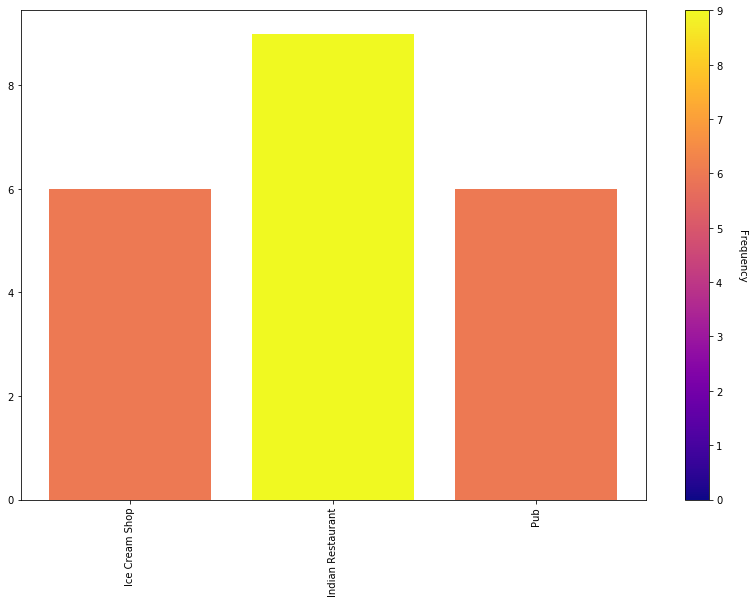

In [484]:
plot_bar(seri[0])

## Bandra,Western Suburbs Distribution

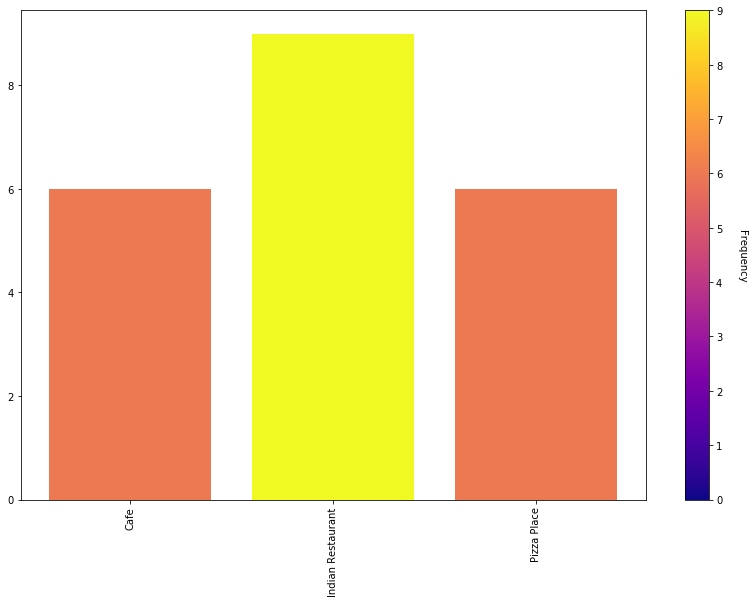

In [485]:
plot_bar(seri[1])

## Eastern Suburbs Distribution

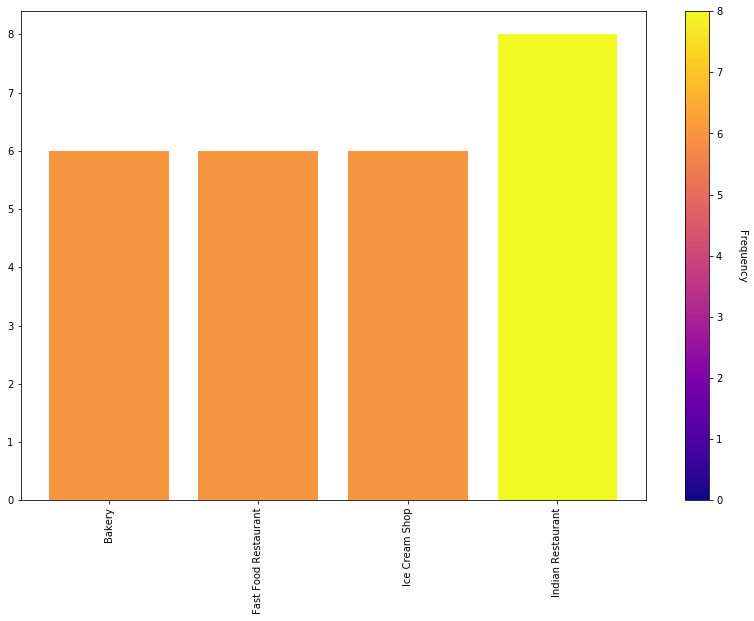

In [486]:
plot_bar(seri[2])

## South Mumbai Distribution

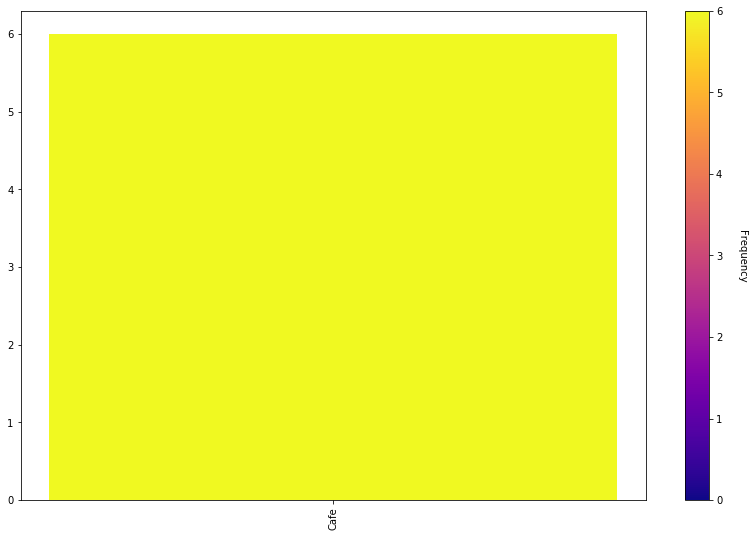

In [487]:
plot_bar(seri[3])

# Note : South Mumbai is both diverse and high in density of categories

In [488]:
sortedcount=seri[3].sort_values(by='Count',ascending=True)
sortedcount[:]

,Category,Count,Location
0,Cafe,6,Harbour Suburbs


# Of the above four graphs we can see that "SouthMumbai" and "Bandra western Suburbs" looks promising

### Now with Folium Lets visualize clusters of "South Mumbai" and "Bandra western Suburbs"

In [489]:
locdf=areas_with_categories_df.loc[:,'Location']
latlngdf=pd.DataFrame(rests_locs_cc_to_area)



loc_with_latlngs_df=pd.merge(locdf,latlngdf,on=locdf.index)
loc_with_cats_df=pd.merge(locdf,pd.DataFrame(rests_cats_acc_to_area),on=locdf.index)

In [490]:
from folium.plugins import MarkerCluster

sm=areas_with_categories_df[areas_with_categories_df.Location=='South Mumbai']

smlatlngs=sm.iloc[:,2:4].values[0]

south_mumbai_map=folium.Map(smlatlngs,zoom_start=12)

marker_cluster=MarkerCluster().add_to(south_mumbai_map)

In [491]:
vals=loc_with_latlngs_df[loc_with_latlngs_df.Location=='South Mumbai'].iloc[:,2:].values
vals=vals[vals!=None]


alts=loc_with_cats_df[loc_with_cats_df.Location=='South Mumbai'].iloc[:,2:].values
alts=alts[alts!=None]

for x in range(len(vals)):
    folium.Marker(vals[x],popup=alts[x],tooltip='Category').add_to(marker_cluster)

# Marker Cluster Map of South Mumbai Distribution

We used Marker Cluster because it presents the map with clusters too

click on the clusters for detailed view

In [492]:
mumbai_map

In [493]:
from folium.plugins import MarkerCluster

bws=areas_with_categories_df[areas_with_categories_df.Location=='Bandra,Western Suburbs']
bwslatlngs=bws.iloc[:,2:4].values[0]

bws_map=folium.Map(bwslatlngs,zoom_start=12)

marker_cluster=MarkerCluster().add_to(bws_map)



In [494]:
vs=loc_with_latlngs_df[loc_with_latlngs_df.Location=='Bandra,Western Suburbs'].iloc[:,2:].values
vs=vs[vs!=None]


ats=loc_with_cats_df[loc_with_cats_df.Location=='Bandra,Western Suburbs'].iloc[:,2:].values
ats=ats[ats!=None]

for x in range(len(vs)):
    folium.Marker(vs[x],popup=ats[x],tooltip='Category').add_to(marker_cluster)

## Bandra western Suburbs Map

In [495]:
bws_map

# Looks like we can be inclined with South Mumbai 

## Find out what are the top 5 Categories from  South Mumbai 

In [496]:
south_mumbai_df=areas_with_categories_df[areas_with_categories_df.Location=='South Mumbai']

series=south_mumbai_df.iloc[:,4:].sum()
series=series[series>15]

top5=series.sort_values(ascending=False).index.tolist()

print('Top 5 Venues :')

print('========================================')
for x in top5 :
    print(x)
    print(20*'=')


Top 5 Venues :
Indian Restaurant
Cafe
Coffee Shop
Fast Food Restaurant
Chinese Restaurant


[Text(0, 0, 'Cafe'),
 Text(0, 0, 'Chinese Restaurant'),
 Text(0, 0, 'Coffee Shop'),
 Text(0, 0, 'Fast Food Restaurant'),
 Text(0, 0, 'Indian Restaurant')]

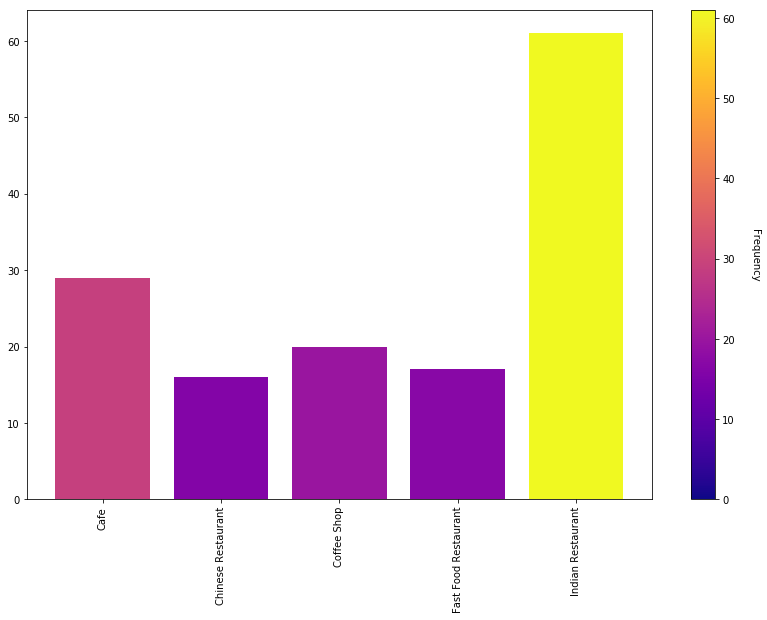

In [497]:
plt.figure(figsize=(14,9))

my_cmap=plt.cm.get_cmap('plasma')



colors=my_cmap([x/max(series.values) for x in series.values])


bars=plt.bar(series.index,series.values,color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(series.values)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Frequency', rotation=270,labelpad=25)

ax=plt.gca()
ax.xaxis.set_ticklabels(series.index,rotation=90)




In [498]:
# By this we can conclude that investing in any of these categories in south mumbai will be a safe bet